# Resampling
## Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Import Train and Test Datasets

In [9]:
# Read the CSV files
y_train = pd.read_csv('Data/y_train.csv')
y_test = pd.read_csv('Data/y_test.csv')
X_test = pd.read_csv('Data/X_test.csv')
X_train = pd.read_csv('Data/X_train.csv')

In [34]:
# Read columns used to build models
columns = pd.read_csv('Data/basic_model_columns.csv')['Columns'].to_list()

## Current Distribution

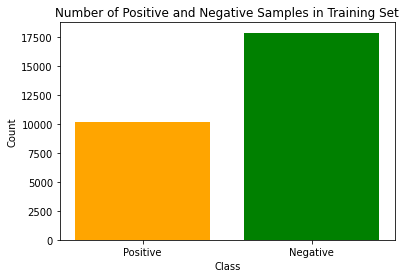

In [20]:
num_positive = np.sum(y_train == 1)[0]
num_negative = np.sum(y_train == 0)[0]

# Plotting
plt.bar(['Positive', 'Negative'], [num_positive, num_negative], color=['orange', 'green'])
plt.title('Number of Positive and Negative Samples in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<h2>Random under-sampling

Undersampling is a method used to balance imbalanced datasets by retaining all instances from the minority class while reducing the number of instances from the majority class.

In [28]:
undersampler = RandomUnderSampler(random_state=42)

# Resample the training data
X_train_under_resampled, y_train_under_resampled = undersampler.fit_resample(X_train, y_train)

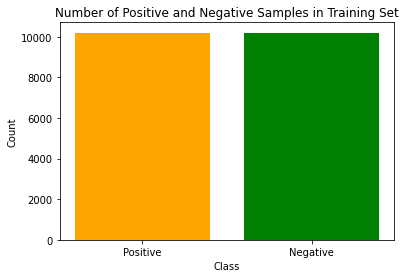

In [29]:
num_positive = np.sum(y_train_under_resampled == 1)[0]
num_negative = np.sum(y_train_under_resampled == 0)[0]

# Plotting
plt.bar(['Positive', 'Negative'], [num_positive, num_negative], color=['orange', 'green'])
plt.title('Number of Positive and Negative Samples in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [30]:
logRegModel = LogisticRegression(max_iter=10000).fit(X_train_under_resampled[columns], y_train_under_resampled.values.ravel())

# Predict the output based on our training and testing dataset
y_train_pred = logRegModel.predict(X_train_under_resampled[columns])
y_test_pred = logRegModel.predict(X_test[columns])

In [31]:
# Set up a dataframe to store the results from different models
train_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
test_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [32]:
train_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_train_under_resampled, y_train_pred),
    "Precision": precision_score(y_train_under_resampled, y_train_pred),
    "Recall": recall_score(y_train_under_resampled, y_train_pred),
    "F1 Score": f1_score(y_train_under_resampled, y_train_pred)
}

test_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.7883974107493135
Precision 	: 0.7855131566171473
Recall 		: 0.7934484111416241
F1 Score 	: 0.7894608441083191

**Test Set Metrics**
Accuracy 	: 0.8136007827788649
Precision 	: 0.5600303951367781
Recall 		: 0.43816884661117717
F1 Score 	: 0.4916611074049366


<h2>Random over-sampling

Oversampling is a technique employed to address class imbalance in datasets by increasing the number of instances in the minority class, typically through duplication or generation of synthetic data, to achieve a more balanced distribution of classes for improved model training.

In [38]:
# Instantiate RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

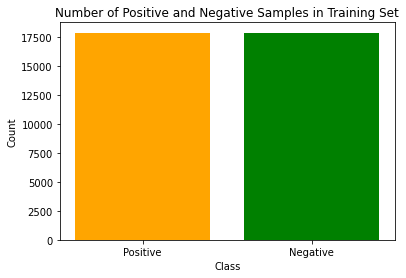

In [39]:
num_positive = np.sum(y_train_resampled == 1)[0]
num_negative = np.sum(y_train_resampled == 0)[0]

# Plotting
plt.bar(['Positive', 'Negative'], [num_positive, num_negative], color=['orange', 'green'])
plt.title('Number of Positive and Negative Samples in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [40]:
logRegModel = LogisticRegression(max_iter=10000).fit(X_train_resampled[columns], y_train_resampled.values.ravel())

# Predict the output based on our training and testing dataset
y_train_pred = logRegModel.predict(X_train_resampled[columns])
y_test_pred = logRegModel.predict(X_test[columns])

In [41]:
train_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_train_resampled, y_train_pred),
    "Precision": precision_score(y_train_resampled, y_train_pred),
    "Recall": recall_score(y_train_resampled, y_train_pred),
    "F1 Score": f1_score(y_train_resampled, y_train_pred)
}

test_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.7875013993059442
Precision 	: 0.7830807384954533
Recall 		: 0.7953095264748684
F1 Score 	: 0.7891477604065423

**Test Set Metrics**
Accuracy 	: 0.8115215264187867
Precision 	: 0.5544401544401545
Recall 		: 0.4268727705112961
F1 Score 	: 0.48236479677527716


<h3>Synthetic over-sampling: SMOTE-NC

SMOTE-NC(Synthetic Minority Over-sampling Technique for Nominal and Continuous) is an extension of the SMOTE algorithm designed specifically for datasets that contain both numerical and categorical features. SMOTE-NC is a method utilized to alleviate class imbalance in datasets by generating synthetic samples in the minority class, thereby augmenting its representation and enabling more robust model training without introducing bias toward the majority class. 

In [42]:
categorical_features = ['type_of_meal_plan_meal plan 1', 'type_of_meal_plan_meal plan 2',
       'type_of_meal_plan_meal plan 3', 'type_of_meal_plan_not selected',
       'room_type_reserved_room_type 1', 'room_type_reserved_room_type 2',
       'room_type_reserved_room_type 3', 'room_type_reserved_room_type 4',
       'room_type_reserved_room_type 5', 'room_type_reserved_room_type 6',
       'room_type_reserved_room_type 7', 'market_segment_type_aviation',
       'market_segment_type_complementary', 'market_segment_type_corporate',
       'market_segment_type_offline', 'market_segment_type_online',
       'arrival_month_1', 'arrival_month_2', 'arrival_month_3',
       'arrival_month_4', 'arrival_month_5', 'arrival_month_6',
       'arrival_month_7', 'arrival_month_8', 'arrival_month_9',
       'arrival_month_10', 'arrival_month_11', 'arrival_month_12',
       'required_car_parking_space', 'repeated_guest', 'type_of_meal_plan',
       'room_type_reserved',  'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type']
categorical_features_indices = [X_train.columns.get_loc(col) for col in categorical_features]
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

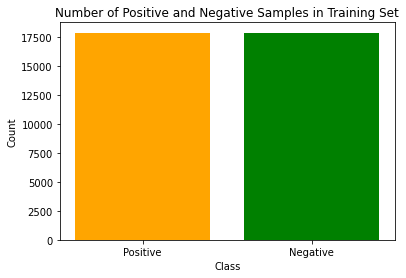

In [43]:
num_positive = np.sum(y_train_resampled == 1)[0]
num_negative = np.sum(y_train_resampled == 0)[0]

# Plotting
plt.bar(['Positive', 'Negative'], [num_positive, num_negative], color=['orange', 'green'])
plt.title('Number of Positive and Negative Samples in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [44]:
logRegModel = LogisticRegression(max_iter=10000).fit(X_train_resampled[columns],  y_train_resampled.values.ravel())

# Predict the output based on our training and testing dataset
y_train_pred = logRegModel.predict(X_train_resampled[columns])
y_test_pred = logRegModel.predict(X_test[columns])

In [45]:
train_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_train_resampled, y_train_pred),
    "Precision": precision_score(y_train_resampled, y_train_pred),
    "Recall": recall_score(y_train_resampled, y_train_pred),
    "F1 Score": f1_score(y_train_resampled, y_train_pred)
}

test_metric = {
    "Classification Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred)
}

# Save to overall metrics dataframe for comparison later
train_metrics = pd.concat([train_metrics, pd.DataFrame.from_records([train_metric])], ignore_index = True)
test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)

# Calculate general metrics for the train set
print("**Training Set Metrics**")
print("Accuracy \t:", train_metric["Accuracy"])
print("Precision \t:", train_metric["Precision"])
print("Recall \t\t:", train_metric["Recall"])
print("F1 Score \t:", train_metric["F1 Score"])

print() # New Line

# Calculate general metrics for the test set
print("**Test Set Metrics**")
print("Accuracy \t:", test_metric["Accuracy"])
print("Precision \t:", test_metric["Precision"])
print("Recall \t\t:", test_metric["Recall"])
print("F1 Score \t:", test_metric["F1 Score"])

**Training Set Metrics**
Accuracy 	: 0.8031176536437927
Precision 	: 0.8018168645154099
Recall 		: 0.8052725847979402
F1 Score 	: 0.8035410092434863

**Test Set Metrics**
Accuracy 	: 0.8145792563600783
Precision 	: 0.5728070175438597
Recall 		: 0.3882282996432818
F1 Score 	: 0.46279234585400425


## Comparing the above three sampling techniques

By analysing the data characteristics, we decide against using SMOTENC due to its sparse one-hot encoded columns ('type_of_meal_plan_meal plan 1' to 'room_type_reserved_room_type 7'). These sparse categorical features could make it challenging for SMOTENC to generate meaningful synthetic samples. Additionally, there may be highly non-linear relationships between features and the target variable, which may further complicate SMOTENC's effectiveness.

Comparing the performance of oversamping and undersampling, undersampling excels in terms of a higher F1 score.  This shows that undersampling can effectively capture relevant information even with a smaller number of samples. Additionally, data resulting from undersampling demands fewer computational resources compared to data obtained through oversampling techniques. Therefore, we decide to apply undersampling on our dataset to solve the imbalance.

In [47]:
# Save undersampled data for future model training
X_train_under_resampled.to_csv('Data/X_train_undersampled_data.csv', index=False)
y_train_under_resampled.to_csv('Data/y_train_undersampled_data.csv', index=False)